# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.simplefilter("ignore")

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости экспериментов")

Для воспроизводимости экспериментов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски в колонках: mileage, engine, max_power, torque, seats    

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
columns = [col for col in df_train.columns if col != 'selling_price']
train_duplicates = df_train[df_train.duplicated(columns)]
print('Количество дубликатов:', len(train_duplicates))

Количество дубликатов: 1159


In [12]:
columns = [col for col in df_test.columns if col != 'selling_price']
test_duplicates = df_test[df_test.duplicated(columns)]
print('Количество дубликатов:', len(test_duplicates))

Количество дубликатов: 69


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
train_duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
df_train = df_train.drop_duplicates(columns)

In [15]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [16]:
assert df_train.shape == (5840, 13)

In [17]:
df_test = df_test.drop_duplicates(columns)

In [18]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [20]:
# создаем булеву маску для столбца mileage
mask1 = df_train['mileage'].notna()
# применяем маску к датафрейму и выполняем операции только для тех строк, где нет NaN
df_train.loc[mask1, 'mileage'] = df_train.loc[mask1, 'mileage'].str.replace('kmpl', '')
df_train.loc[mask1, 'mileage'] = df_train.loc[mask1, 'mileage'].str.replace('km/kg', '')
df_train.loc[mask1, 'mileage'] = df_train.loc[mask1, 'mileage'].astype(float)

mask2 = df_train['engine'].notna()
df_train.loc[mask2, 'engine'] = df_train.loc[mask2, 'engine'].str.replace('CC', '')
df_train.loc[mask2, 'engine'] = df_train.loc[mask2, 'engine'].astype(float)

mask3 = df_train['max_power'].notna() 
df_train.loc[mask3, 'max_power'] = df_train.loc[mask3, 'max_power'].str.replace('bhp', '')

# Находим позицию элемента, который равен ''
position = df_train['max_power'][df_train['max_power'] == ' '].index
# Находим номер элемента по его позиции
index = df_train.iloc[position]
index

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,,NaN,8.0


In [21]:
df_train.loc[3586, 'max_power'] = np.nan
df_train.loc[mask3, 'max_power'] = df_train.loc[mask3, 'max_power'].astype(float)

In [22]:
# создаем булеву маску для столбца mileage
mask1 = df_test['mileage'].notna()
# применяем маску к датафрейму и выполняем операции только для тех строк, где нет NaN
df_test.loc[mask1, 'mileage'] = df_test.loc[mask1, 'mileage'].str.replace('kmpl', '')
df_test.loc[mask1, 'mileage'] = df_test.loc[mask1, 'mileage'].str.replace('km/kg', '')
df_test.loc[mask1, 'mileage'] = df_test.loc[mask1, 'mileage'].astype(float)

mask2 = df_test['engine'].notna()
df_test.loc[mask2, 'engine'] = df_test.loc[mask2, 'engine'].str.replace('CC', '')
df_test.loc[mask2, 'engine'] = df_test.loc[mask2, 'engine'].astype(float)

mask3 = df_test['max_power'].notna() 
df_test.loc[mask3, 'max_power'] = df_test.loc[mask3, 'max_power'].str.replace('bhp', '')
df_test.loc[mask3, 'max_power'] = df_test.loc[mask3, 'max_power'].astype(float)

In [23]:
import re
def clean_torque(df):
    df = df.copy()
    
    df['torque'] = df['torque'].astype(str).str.replace(r'[, ]', '', regex=True)
    
    patterns = [r'(.*)@', r'(.*)at(.*)', r'(.*)kgm(.*)','(.*)@ ']
    
    df['Torque'] = ''
    df['max_torque_rpm'] = ''
    
    # Iterate through the patterns to extract parts
    for pattern in patterns:
        part1 = df['torque'].str.extract(pattern)[0]
        
        # Update Part1 and Part2 if a match is found
        df.loc[part1.notnull(),'Torque'] = part1
    
    # Remove the units from the extracted values
    df['Torque']= df['Torque'].str.replace('Nm', '')
    df['Torque']= df['Torque'].str.replace('kgm', '')
    df['Torque']= df['Torque'].str.replace('KGM', '')
    df['Torque']= df['Torque'].str.replace('nm', '')
    
    # Iterate through the patterns to extract parts
    for pattern in patterns:
        part1 = df['Torque'].str.extract(pattern)[0]
        df.loc[part1.notnull(),'Torque'] = part1
        
    # Define a function to extract the 4-digit number before "rpm" or "(kgm@rpm)" in a string
    def extract_torque(text):
        match = re.search(r"(\d{4})(rpm|(kgm@rpm))", text)
        if match:
            return int(match.group(1))
        return None
    
    # Apply the function to the 'torque' column and create a new 'max_torque_rpm' column
    df['max_torque_rpm'] = df['torque'].apply(extract_torque)
    
    # Convert the extracted values to their respective data types
    df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')
    
    # Drop the original 'torque' column and rename the new one
    df.drop('torque', axis=1, inplace=True)
    df.rename(columns={"Torque": "torque"}, inplace=True)
    
    return df

df_train = clean_torque(df_train)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,22.40,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0,11.50,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000.0


In [24]:
df_test = clean_torque(df_test)
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0,260.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0,172.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0,200.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0,96.0,3000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
from sklearn.impute import SimpleImputer
cols = ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df_train[cols])
df_train[cols] = imp_median.transform(df_train[cols])
df_test[cols] = imp_median.transform(df_test[cols])

In [99]:
import pickle
with open("fill_df.pickle", "wb") as f:
    pickle.dump(imp_median, f)

In [26]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64

In [27]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [28]:
print("<Потому что у нас ограниченное количество вариантов сидений (5 или 6) + сложно сказать какая машина лучше: с 5 местами или 2. Поэтому можно этот признак закодировать>")

<Потому что у нас ограниченное количество вариантов сидений (5 или 6) + сложно сказать какая машина лучше: с 5 местами или 2. Поэтому можно этот признак закодировать>


In [29]:
df_train = df_train.astype({'engine': 'int', 'seats': 'int'})
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.0,2500.0


In [30]:
df_test = df_test.astype({'engine': 'int', 'seats': 'int'})
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,5,260.0,2750.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

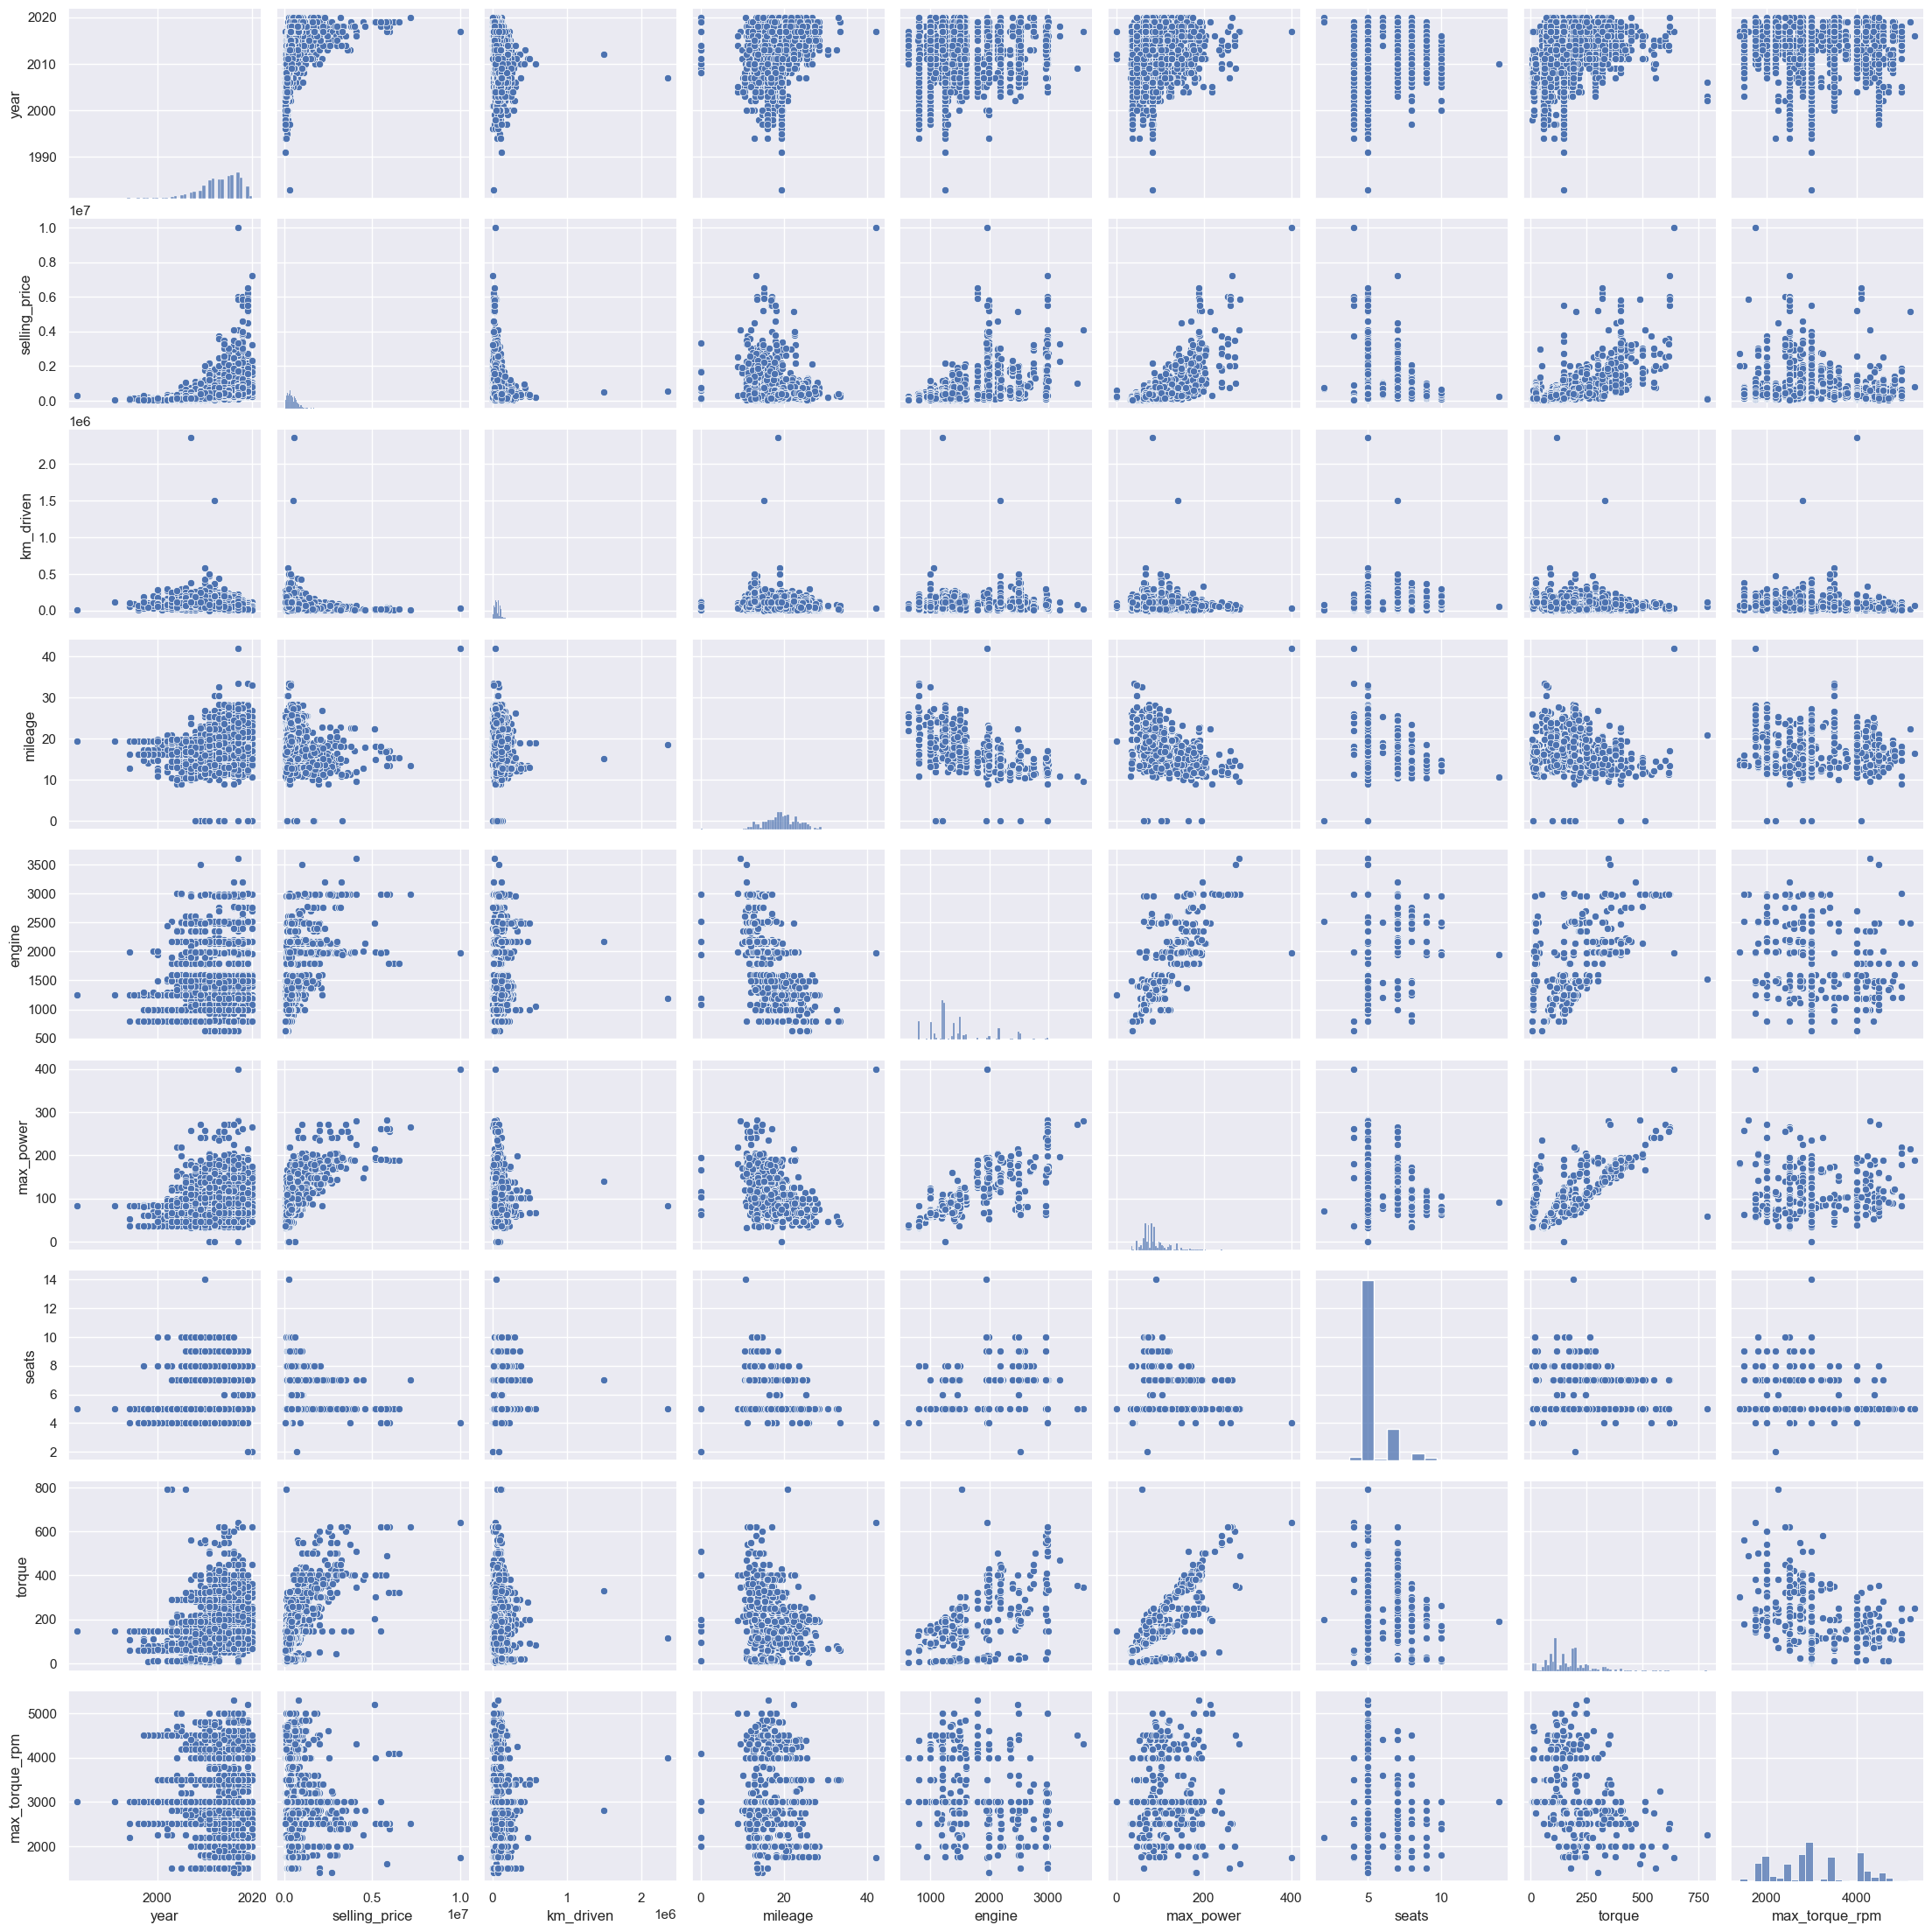

In [31]:
sns.pairplot(df_train) 

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

По поводу целевой переменной: видно, что зависимость, похожая на линейную наблюдается у целевой переменной с признаком torque и max_power.

Практически линейная зависимость видна между признаками max_power и torque, а также engine и max_power. 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

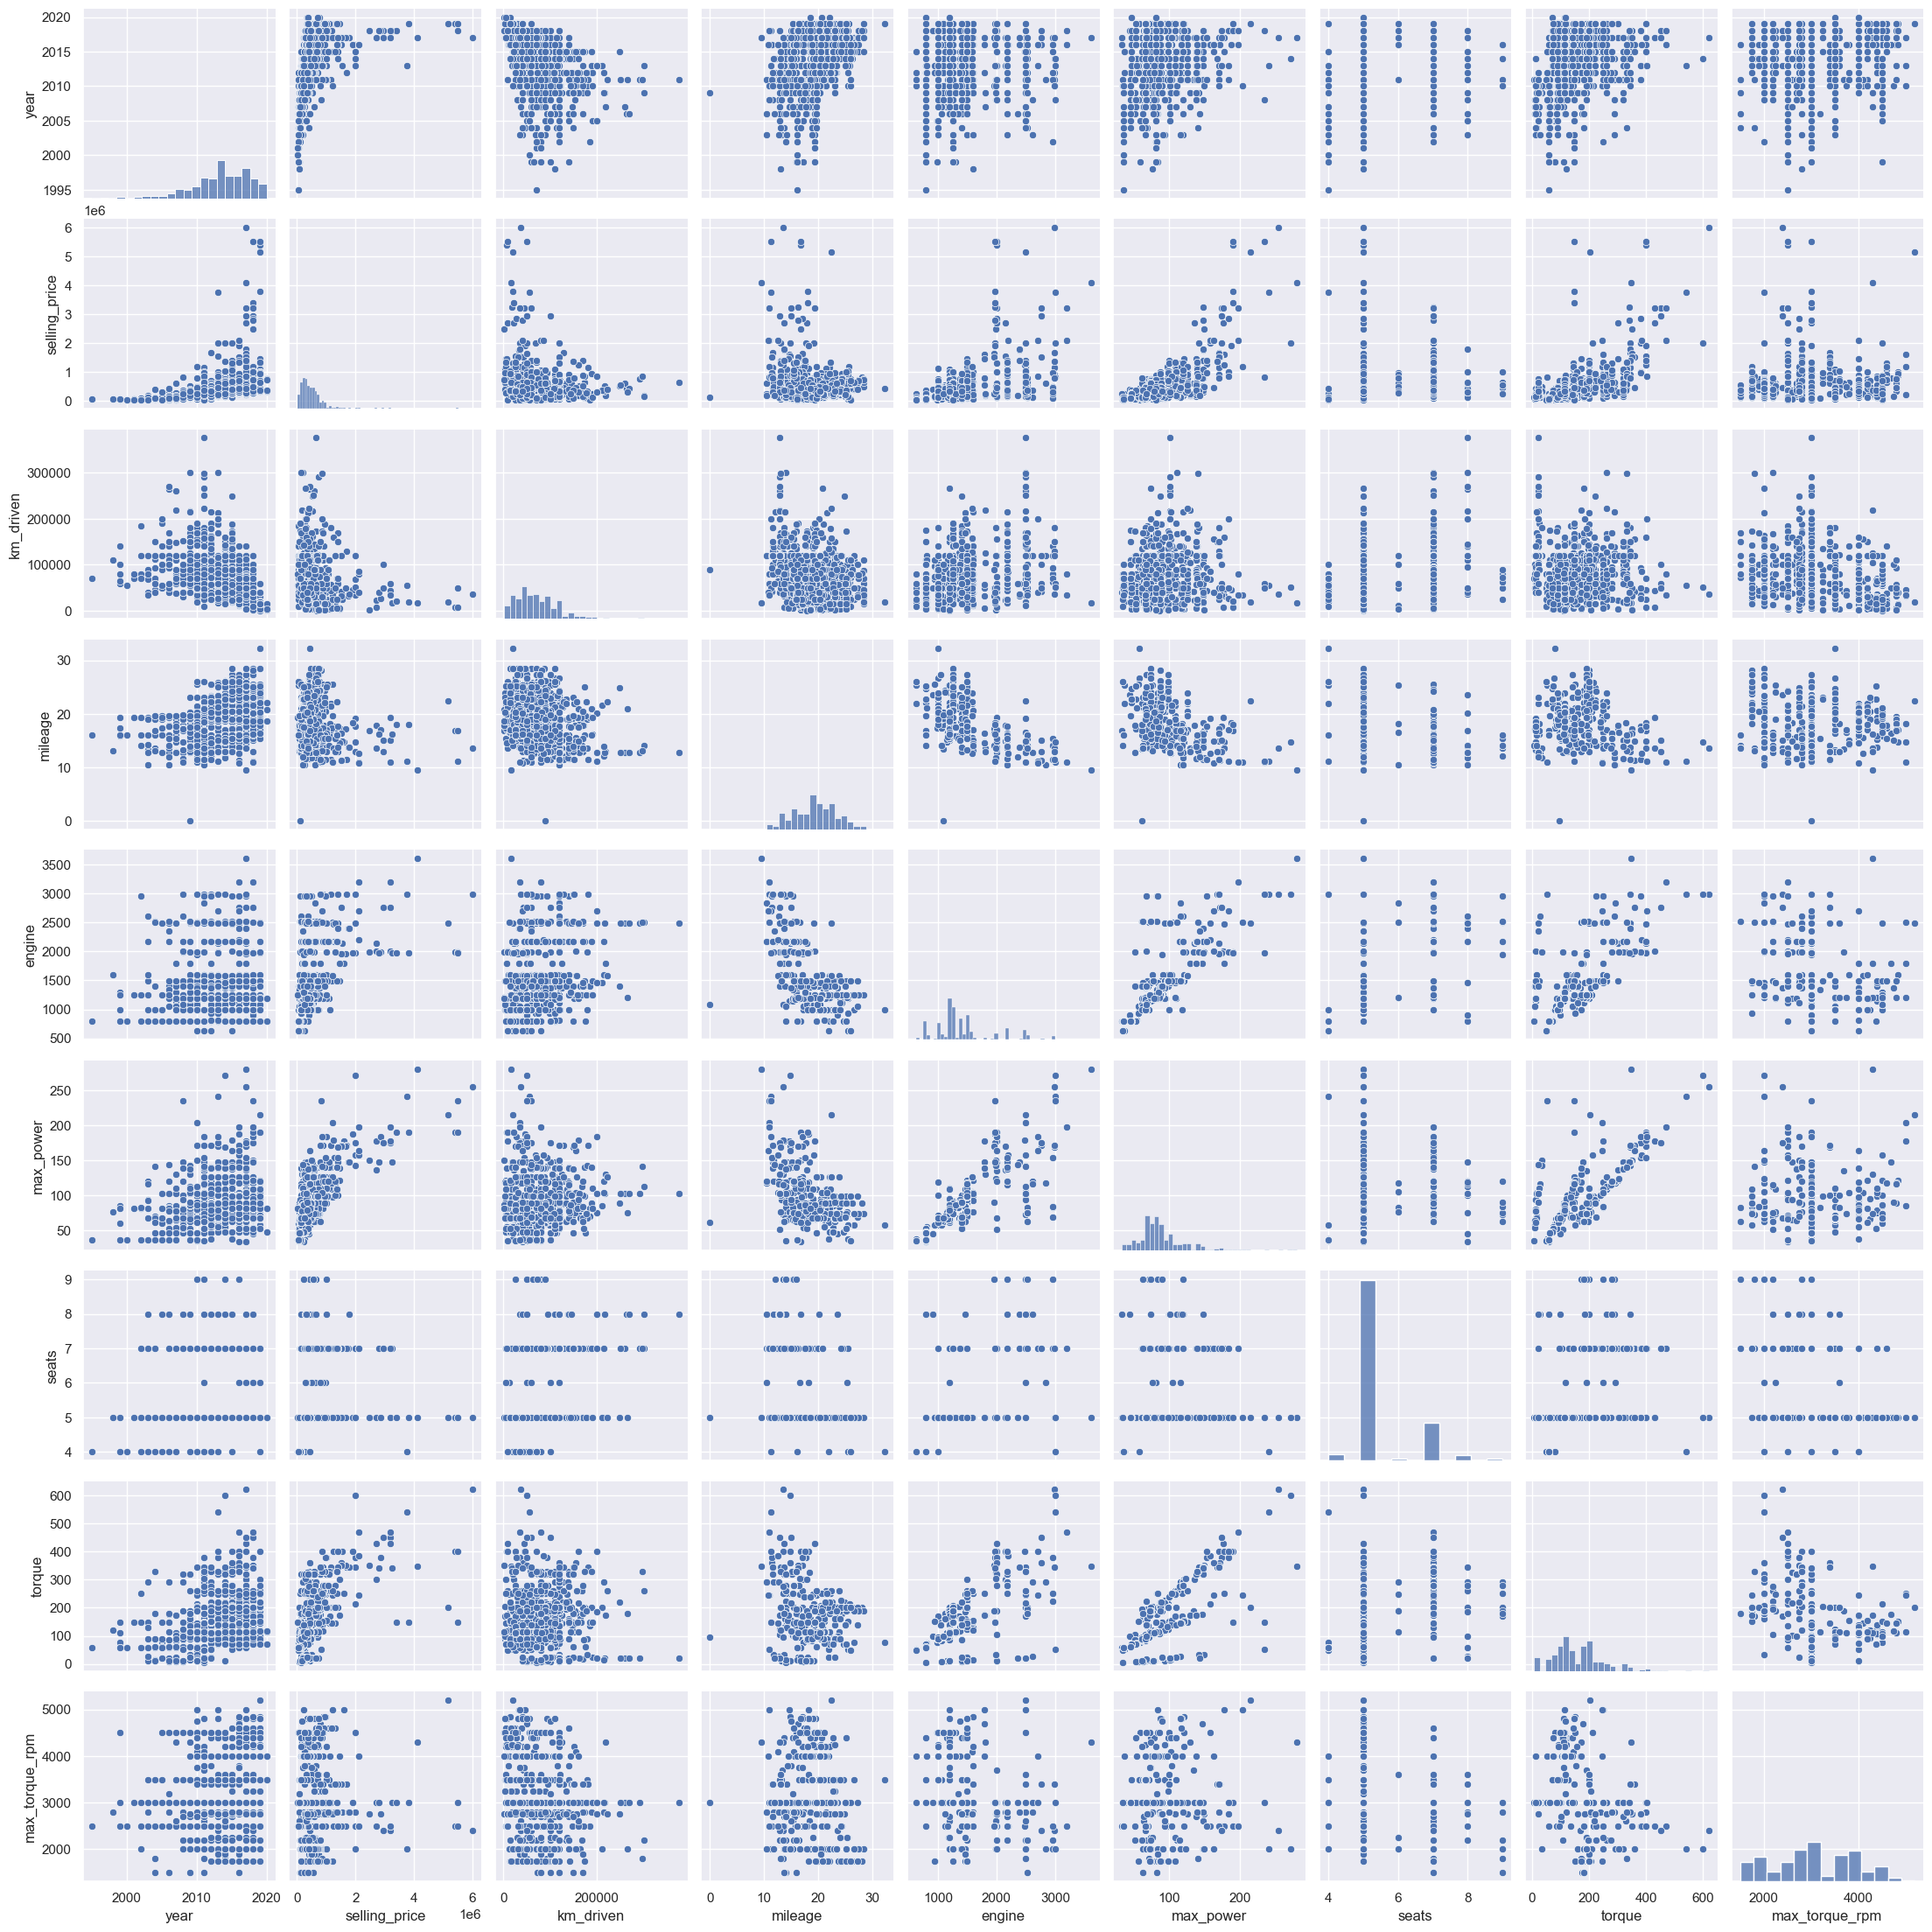

In [32]:
sns.pairplot(df_test) 

В целом да, видны те же линейные зависимости у целевой переменной и признаков.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

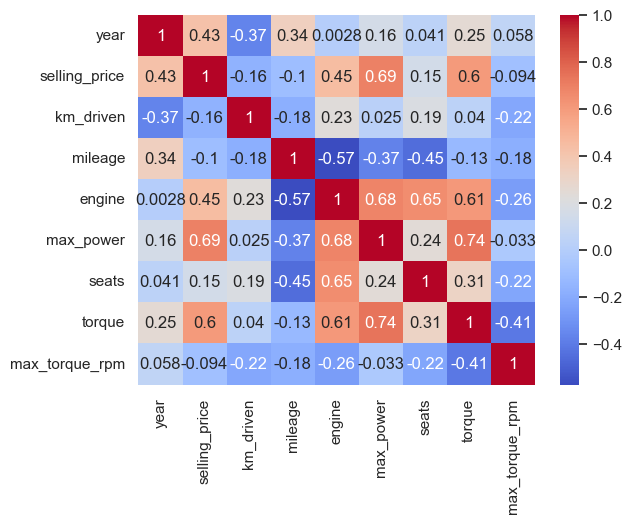

In [33]:
df_train_numeric = df_train.select_dtypes('number')

#compute correlation matrix
corr_matrix = df_train_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [39]:
corr_pairs = corr_matrix.unstack().abs().sort_values(ascending=False).drop_duplicates()
corr_pairs.head(5)

year       year             1.000000
torque     max_power        0.740607
max_power  selling_price    0.692814
engine     max_power        0.681117
           seats            0.652172
dtype: float64

In [40]:
corr_pairs.tail(5)

year            seats        0.041178
torque          km_driven    0.040004
max_torque_rpm  max_power    0.033362
km_driven       max_power    0.024588
engine          year         0.002819
dtype: float64

1. Наименее скоррелированы признаки **engine** и **year**.  

2. Сильная положительная линейная зависимость наблюдается между признаками: **torque** и **max_power**, **max_power** и **selling_price**

3. Да верно, т.к. между этими признаками отрицательная корреляция.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='torque', ylabel='max_power'>

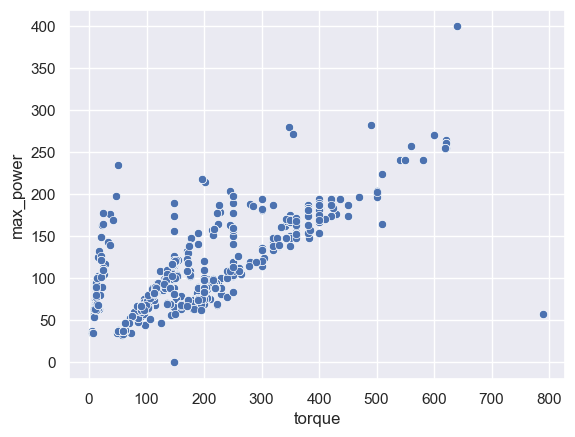

In [39]:
sns.set_style("darkgrid")
sns.scatterplot(data=df_train, x=df_train["torque"], y=df_train["max_power"])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Нужно посмотреть на распределения числовых признаков. Если распределение не нормальное, то можно, например, путем логарифмирования этих признков привести их к нормальному виду.

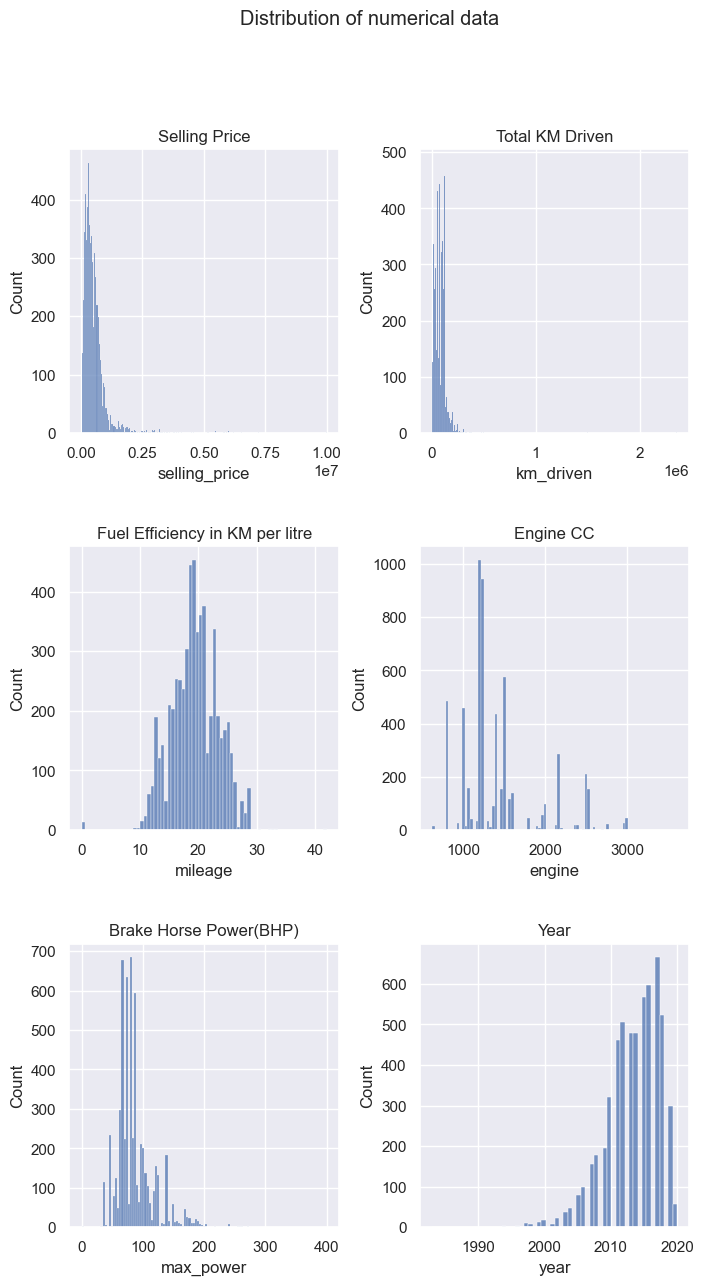

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))

# Добавляем заголовки для каждого субплота
titles = ["Selling Price", "Total KM Driven", "Fuel Efficiency in KM per litre",
          "Engine CC", "Brake Horse Power(BHP)", "Year","Number of Seats"]

# Строим гистограммы для каждого числового признака
sns.histplot(data=df_train, x='selling_price', ax=axes[0, 0])
sns.histplot(data=df_train, x='km_driven', ax=axes[0, 1])
sns.histplot(data=df_train, x='mileage', ax=axes[1, 0])
sns.histplot(data=df_train, x='engine', ax=axes[1, 1])
sns.histplot(data=df_train, x='max_power', ax=axes[2, 0])
sns.histplot(data=df_train, x='year', ax=axes[2, 1])

# Добавляем заголовки для каждого субплота
for i, ax in enumerate(fig.axes):
    ax.set_title(titles[i])

# Добавляем общий заголовок для фигуры
fig.suptitle("Distribution of numerical data")
plt.subplots_adjust(wspace=0.3, hspace=0.4)

Еще можно построить боксплоты для обнаружения выбросов.

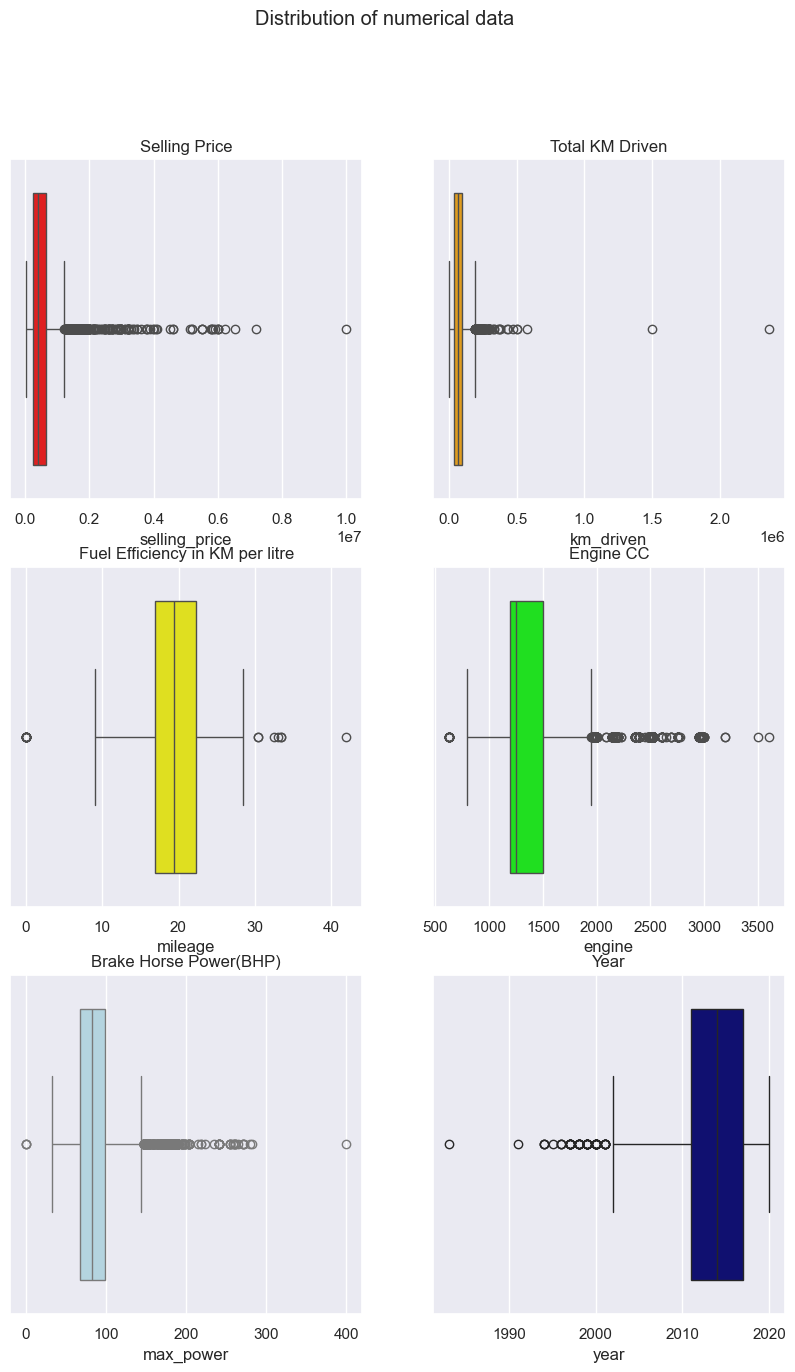

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].set_title("Selling Price")
axes[0, 1].set_title("Total KM Driven")
axes[1, 0].set_title("Fuel Efficiency in KM per litre")
axes[1, 1].set_title("Engine CC")
axes[2, 0].set_title("Brake Horse Power(BHP)")
axes[2, 1].set_title("Year")

# Строим ящик с усами для каждого числового признака
sns.boxplot(x=df_train['selling_price'], ax=axes[0, 0], color='red')
sns.boxplot(x=df_train['km_driven'], ax=axes[0, 1], color='orange')
sns.boxplot(x=df_train['mileage'], ax=axes[1, 0], color='yellow')
sns.boxplot(x=df_train['engine'], ax=axes[1, 1], color='lime')
sns.boxplot(x=df_train['max_power'], ax=axes[2, 0], color='lightblue')
sns.boxplot(x=df_train['year'], ax=axes[2, 1], color='navy')

fig.suptitle("Distribution of numerical data")
plt.show()

Также было бы неплохо посмотреть на распределение категориальных фичей, которые в будущем можно будет закодировать определнным образом, исходя из их распределения

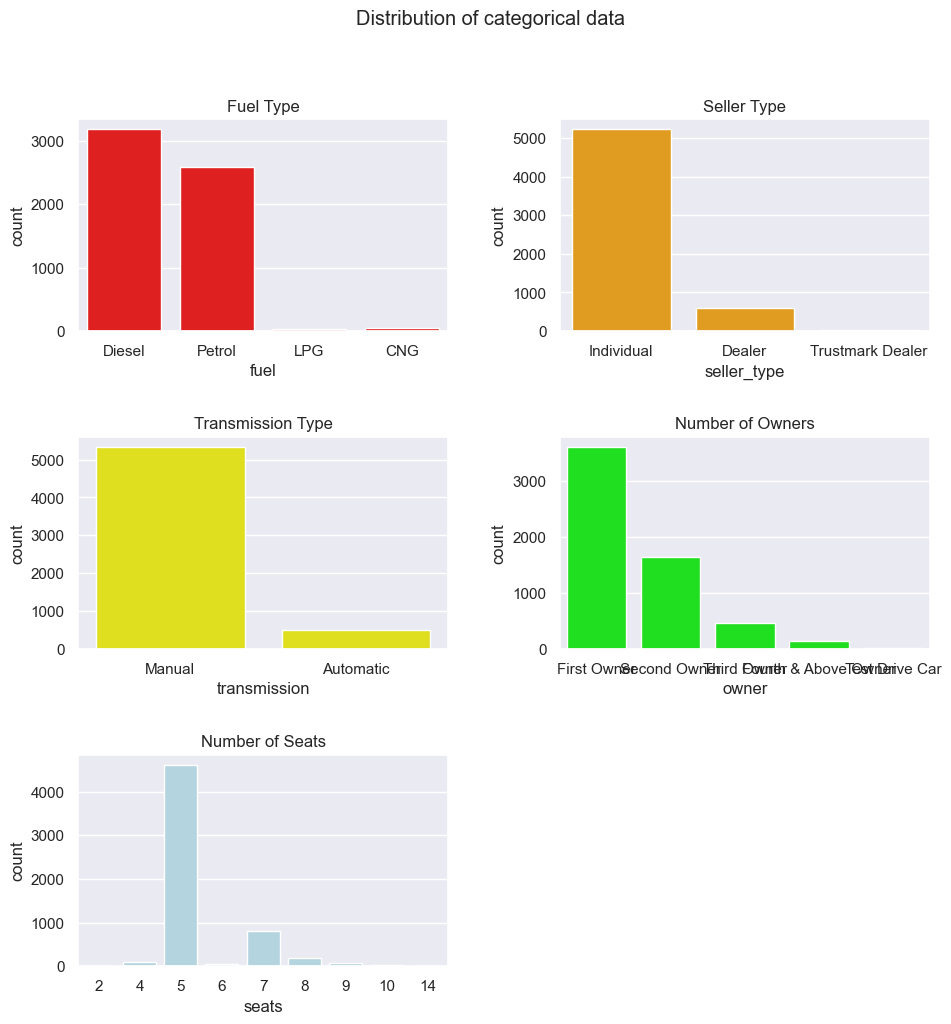

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(11, 11))

axes[0, 0].set_title("Fuel Type")
axes[0, 1].set_title("Seller Type")
axes[1, 0].set_title("Transmission Type")
axes[1, 1].set_title("Number of Owners")
axes[2, 0].set_title("Number of Seats")

# Строим столбчатые диаграммы для каждого категориального признака
sns.countplot(x='fuel', data=df_train, ax=axes[0, 0], color='red')
sns.countplot(x='seller_type', data=df_train, ax=axes[0, 1], color='orange')
sns.countplot(x='transmission', data=df_train, ax=axes[1, 0], color='yellow')
sns.countplot(x='owner', data=df_train, ax=axes[1, 1], color='lime')
sns.countplot(x='seats', data=df_train, ax=axes[2, 0],color='lightblue')
fig.delaxes(axes[2, 1])
fig.suptitle("Distribution of categorical data")
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [41]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=["selling_price"])

In [42]:
X_train

,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
0,2014,145500,23.40,1248,74.00,5,190.00,2000.0
1,2014,120000,21.14,1498,103.52,5,250.00,2500.0
2,2010,127000,23.00,1396,90.00,5,22.40,2750.0
3,2007,120000,16.10,1298,88.20,5,11.50,3000.0
4,2017,45000,20.14,1197,81.86,5,113.75,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5,96.10,3000.0
5836,2013,50000,18.90,998,67.10,5,90.00,3500.0
5837,2013,110000,18.50,1197,82.85,5,113.70,4000.0
5838,2007,119000,16.80,1493,110.00,5,24.00,3000.0


In [43]:
#assert X_train.shape == (5840, 6), сказали закоментить

In [44]:
df_test_numeric = df_test.select_dtypes('number')

y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=["selling_price"])

In [45]:
#assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Train MSE = %.4f" % MSE(y_train, y_pred_train))
print("Test MSE = %.4f" %  MSE(y_test, y_pred_test))

print("Train $R^2$ = %.4f" % r2_score(y_train, y_pred_train))
print("Test $R^2$ = %.4f" %  r2_score(y_test, y_pred_test))

Train MSE = 114138574995.9611
Test MSE = 134677888280.0511
Train $R^2$ = 0.6018
Test $R^2$ = 0.6239


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print("Train MSE = %.4f" % MSE(y_train, y_pred_train))
print("Test MSE = %.4f" %  MSE(y_test, y_pred_test))

print("Train $R^2$ = %.4f" % r2_score(y_train, y_pred_train))
print("Test $R^2$ = %.4f" %  r2_score(y_test, y_pred_test))

Train MSE = 114138574995.9609
Test MSE = 134677888280.0441
Train $R^2$ = 0.6018
Test $R^2$ = 0.6239


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [49]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)
    
    sns.barplot(y=features, x=list(weights), ax=axs[0], palette='viridis')
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1], palette='viridis')
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2], palette='viridis')
    axs[2].set_xlabel("Scale")
    plt.tight_layout()



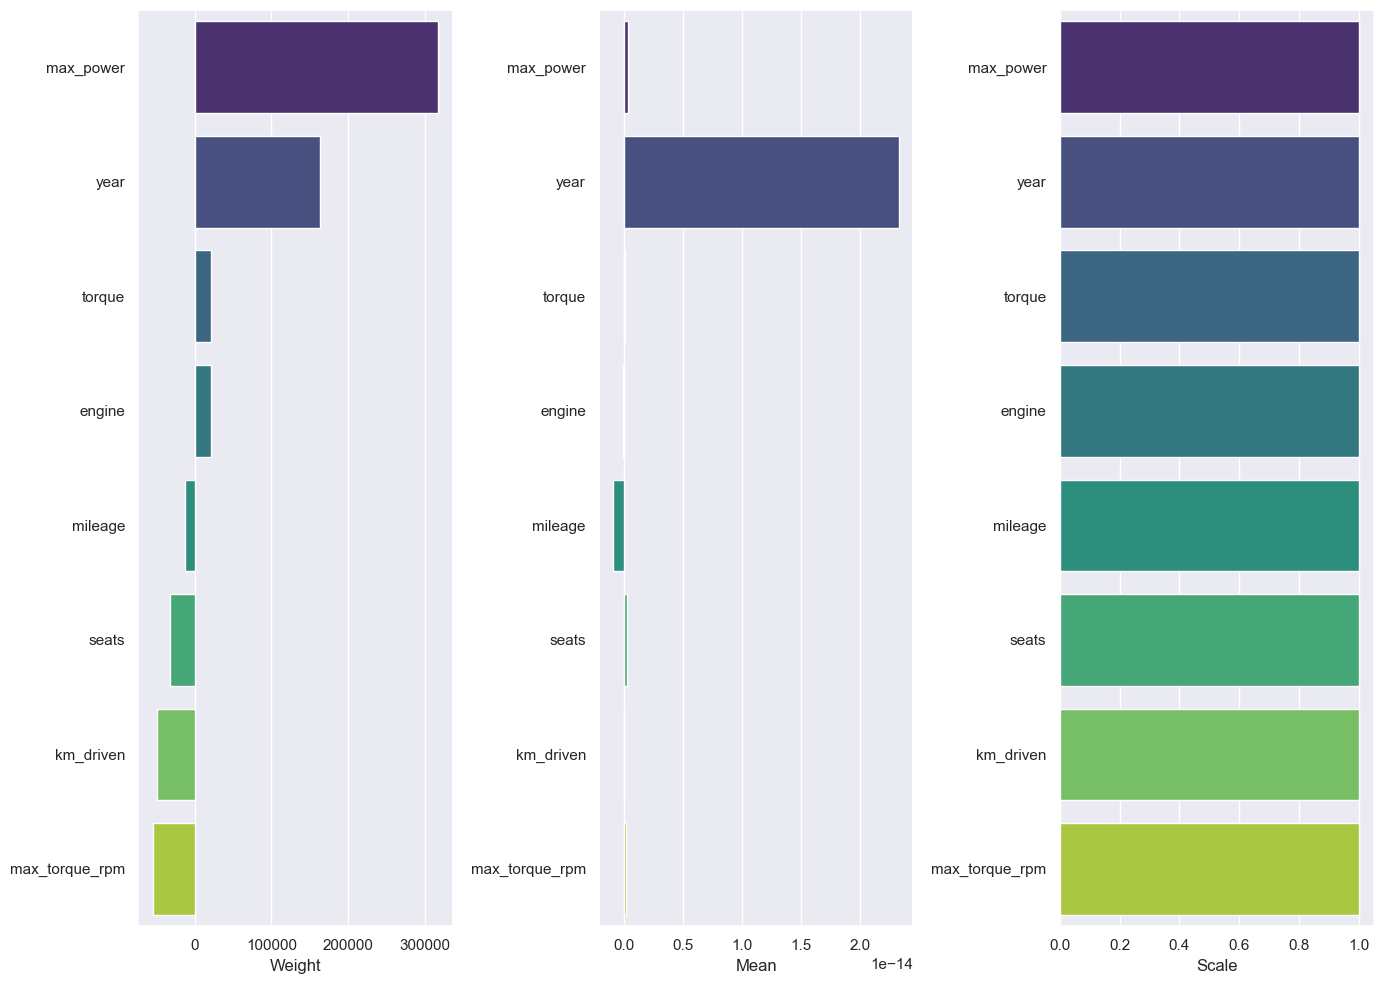

In [50]:
numeric_features = X_train.columns
means = pd.Series(data=X_train_scaled.mean(axis=0))
scales = pd.Series(data=X_train_scaled.std(axis=0))
show_weights(numeric_features, lr.coef_, means, scales)

Видим, что самый большой вес имеет признак max_power. Он и является самым информативным.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

print("Train MSE = %.4f" % MSE(y_train, y_pred_train))
print("Test MSE = %.4f" %  MSE(y_test, y_pred_test))

print("Train $R^2$ = %.4f" % r2_score(y_train, y_pred_train))
print("Test $R^2$ = %.4f" %  r2_score(y_test, y_pred_test))

Train MSE = 114138575010.3357
Test MSE = 134678189360.3507
Train $R^2$ = 0.6018
Test $R^2$ = 0.6239


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [52]:
lasso.coef_

array([164002.21641088, -49036.31891865, -12289.9625618 ,  20683.1970448 ,
       317710.58464303, -32607.45048273,  21807.63872654, -54683.18437317])

Как мы видим, нулевых весов не оказалось. $L_1$ реугляризация зануляет малые по модулю веса, у нас они порядка $10^4$. Чтобы занулить такие веса, коэффициент регуляризации $\alpha$ должен быть такого же порядка.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Best alpha = 20995.9960


Text(0, 0.5, 'CV score')

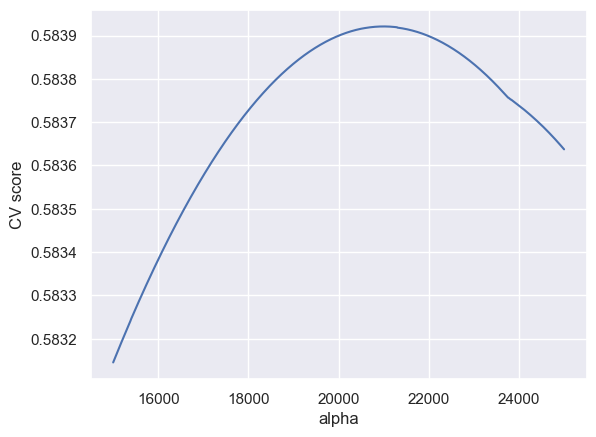

In [55]:
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(1.5e4, 2.5e4, 1000)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="r2", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, searcher.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("CV score")

In [56]:
lasso = Lasso(alpha=21000).fit(X_train_scaled, y_train)
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

print("Train MSE = %.4f" % MSE(y_train, y_pred_train))
print("Test MSE = %.4f" %  MSE(y_test, y_pred_test))

print("Train $R^2$ = %.4f" % r2_score(y_train, y_pred_train))
print("Test $R^2$ = %.4f" %  r2_score(y_test, y_pred_test))

Train MSE = 116408615068.7950
Test MSE = 141512705257.7615
Train $R^2$ = 0.5939
Test $R^2$ = 0.6048


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10000 моделй, исходя из количества гиперпараметров $\alpha$, которые подбирались на CV при 10 фолдах.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [57]:
lasso.coef_

array([141994.48916639, -27533.63526667,      0.        ,      0.        ,
       299154.88270226,     -0.        ,  38630.71383274, -17350.3017861 ])

Лучший коэффициент регуляризации $\approx 21000$. И при этом мы видим, что 3 коэффициента оказались нулевыми.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [59]:
from sklearn.linear_model import ElasticNet

params= {"alpha": np.linspace(0, 10, 100), # коэффициент регуляризации
        "l1_ratio": np.linspace(0, 1, 100)} # баланс между L1 и L2 регуляризацией

eNet = ElasticNet()
searcher = GridSearchCV(ElasticNet(), [params], scoring="r2", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
best_l1_ratio = searcher.best_params_["l1_ratio"]

print("Best alpha = %.4f" % best_alpha)
print("Best l1_ratio = %.4f" % best_l1_ratio)

Best alpha = 6.2626
Best l1_ratio = 0.9798


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Получили, что $Best \;\alpha = 6.2626$, $Best\; l1_{ratio} = 0.9798$.

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [60]:
X_train_cat = df_train.drop(columns=["selling_price", "name"])
X_test_cat = df_test.drop(columns=["selling_price", "name"])

In [61]:
X_train_cat.shape

(5840, 12)

In [62]:
#assert X_train_cat.shape == (5840, 10)

In [63]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [64]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cols = ['seats', 'fuel', 'seller_type', 'transmission', 'owner']
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
encoded = encoder.fit(X_train_cat[cols])
X_train_encoded = pd.DataFrame(encoded.transform(X_train_cat[cols]).toarray(),columns=encoded.get_feature_names_out(cols),dtype=int)
X_train_encoded = pd.concat([X_train_cat.drop(columns=cols), X_train_encoded], axis=1)

In [65]:
X_train_encoded.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats_4,seats_5,seats_6,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,190.00,2000.0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.00,2500.0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,2010,127000,23.00,1396,90.00,22.40,2750.0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,11.50,3000.0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.75,4000.0,0,1,0,...,0,0,1,1,0,1,0,0,0,0


In [66]:
X_test_encoded = pd.DataFrame(encoded.transform(X_test_cat[cols]).toarray(),columns=encoded.get_feature_names_out(cols),dtype=int)
X_test_encoded = pd.concat([X_test_cat.drop(columns=cols), X_test_encoded], axis=1)

In [67]:
X_test_encoded.head(5)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats_4,seats_5,seats_6,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.0,2498,112.0,260.0,2200.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2017,25000,21.5,1497,108.5,260.0,2750.0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,2007,218463,12.9,1799,130.0,172.0,4300.0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,2015,173000,25.1,1498,98.6,200.0,1750.0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,2011,70000,16.5,1172,65.0,96.0,3000.0,0,1,0,...,0,0,1,1,0,1,0,1,0,0


In [68]:
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Best alpha = 474.7475
0.6268869624358123


Text(0, 0.5, 'CV score')

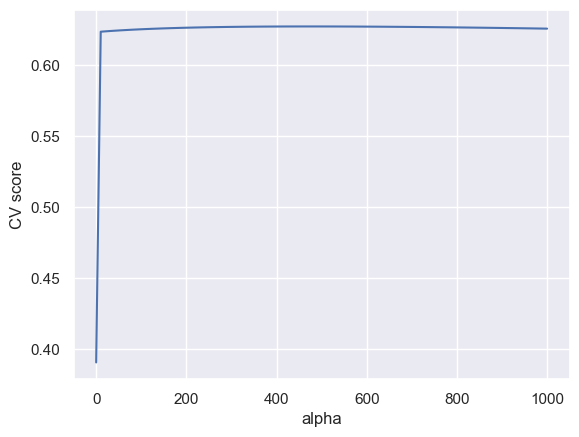

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(0, 1000, 100)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="r2", cv=10)
searcher.fit(X_train_encoded_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)
print(searcher.best_score_)
plt.plot(alphas, searcher.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("CV score")

In [71]:
ridge = Ridge(alpha=470).fit(X_train_encoded_scaled, y_train)
y_pred_train = ridge.predict(X_train_encoded_scaled)
y_pred_test = ridge.predict(X_test_scaled)

print("Train MSE = %.4f" % MSE(y_train, y_pred_train))
print("Test MSE = %.4f" % MSE(y_test, y_pred_test))

print("Train R^2 = %.4f" % r2_score(y_train, y_pred_train))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred_test))

Train MSE = 94701160897.2353
Test MSE = 132298943189.7283
Train R^2 = 0.6696
Test R^2 = 0.6305


Видим, что качество немного увеличилось.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

#### Добавим новую колонку age (возраст автомобиля), а старую year удалим.
#### P.S. Насколько я понял этот датасет 2021 года, поэтому вычитаем из него.

In [72]:
df_train['age'] = 2021 - df_train['year']
df_train.drop(['year'],axis = 1,inplace = True)
df_train['owner'] = df_train['owner'].replace({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4})
df_train.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5,190.00,2000.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5,250.00,2500.0,7
2,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5,22.40,2750.0,11
3,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5,11.50,3000.0,14
4,Hyundai Xcent 1.2 VTVT E Plus,440000,45000,Petrol,Individual,Manual,1,20.14,1197,81.86,5,113.75,4000.0,4


In [73]:
df_test['age'] = 2021 - df_test['year']
df_test.drop(['year'],axis = 1,inplace = True)
df_test['owner'] = df_test['owner'].replace({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4})

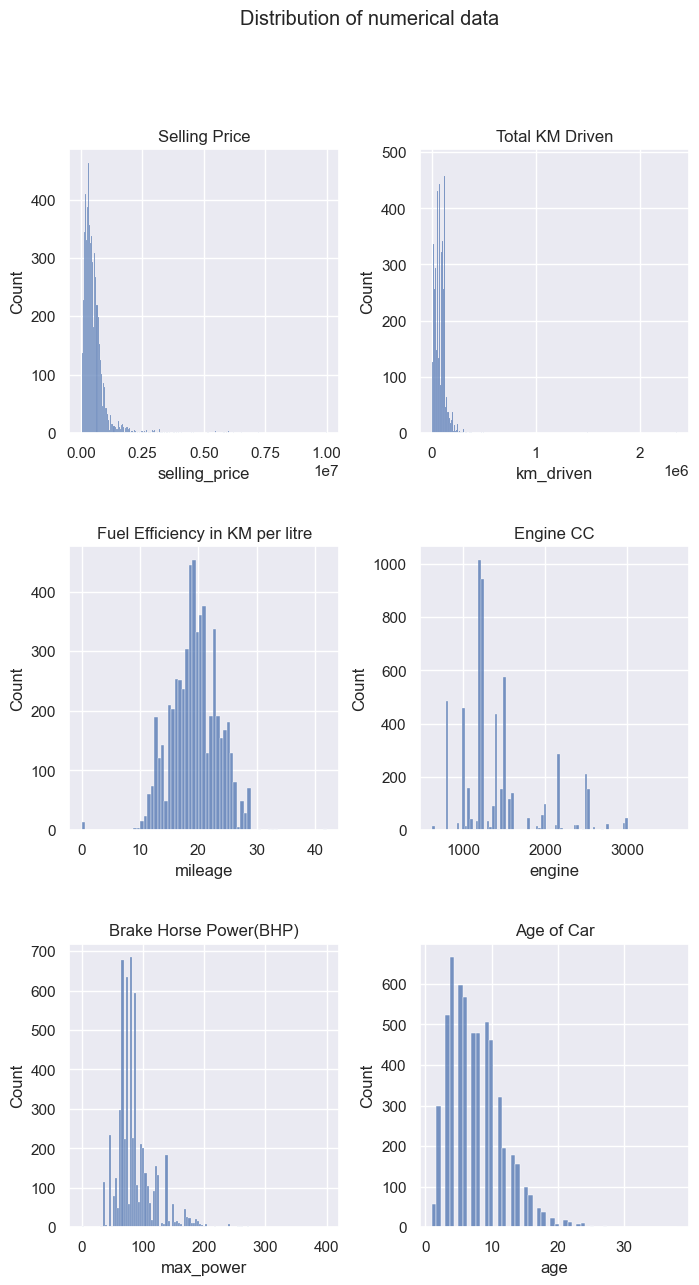

In [74]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))

# Добавляем заголовки для каждого субплота
titles = ["Selling Price", "Total KM Driven", "Fuel Efficiency in KM per litre",
          "Engine CC", "Brake Horse Power(BHP)", "Age of Car","Number of Seats"]

# Строим гистограммы для каждого числового признака
sns.histplot(data=df_train, x='selling_price', ax=axes[0, 0])
sns.histplot(data=df_train, x='km_driven', ax=axes[0, 1])
sns.histplot(data=df_train, x='mileage', ax=axes[1, 0])
sns.histplot(data=df_train, x='engine', ax=axes[1, 1])
sns.histplot(data=df_train, x='max_power', ax=axes[2, 0])
sns.histplot(data=df_train, x='age', ax=axes[2, 1])

# Добавляем заголовки для каждого субплота
for i, ax in enumerate(fig.axes):
    ax.set_title(titles[i])

# Добавляем общий заголовок для фигуры
fig.suptitle("Distribution of numerical data")
plt.subplots_adjust(wspace=0.3, hspace=0.4)

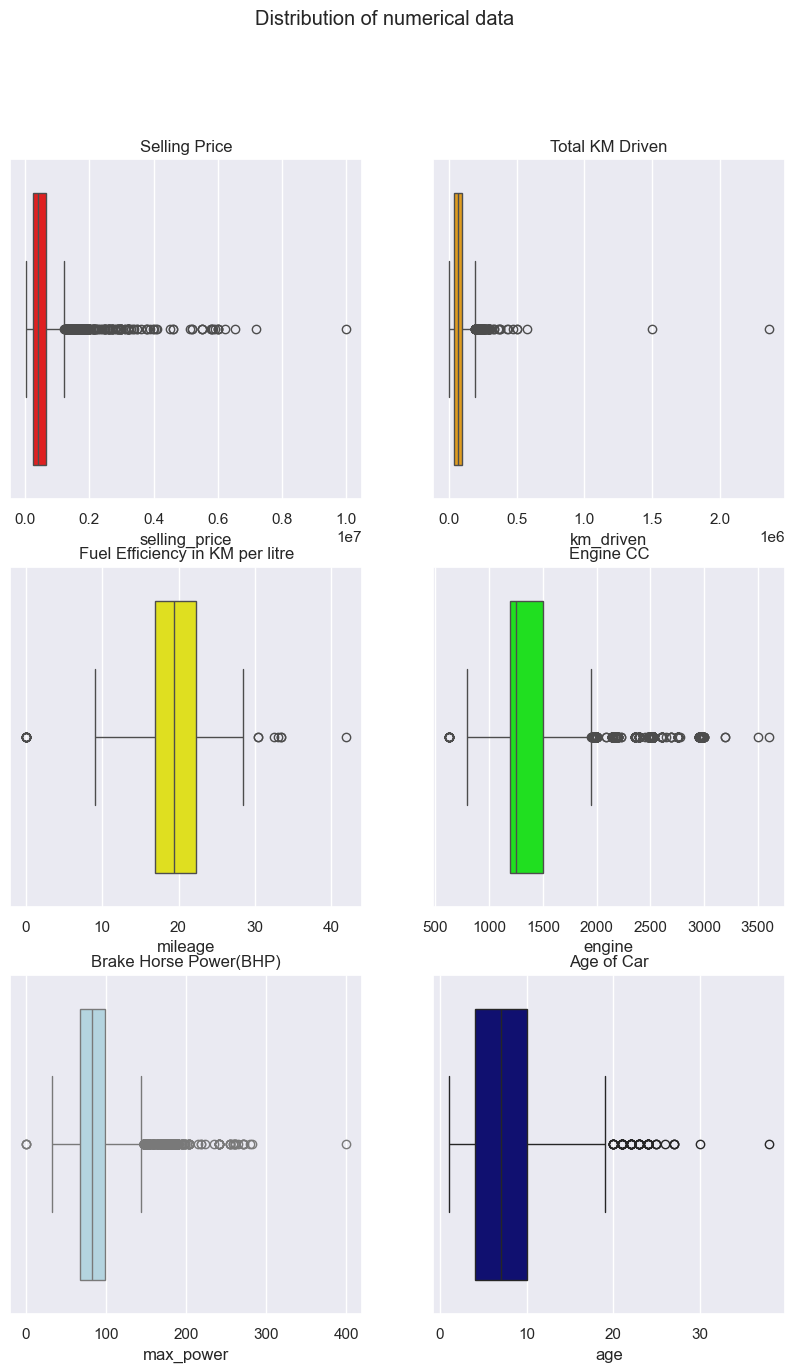

In [75]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].set_title("Selling Price")
axes[0, 1].set_title("Total KM Driven")
axes[1, 0].set_title("Fuel Efficiency in KM per litre")
axes[1, 1].set_title("Engine CC")
axes[2, 0].set_title("Brake Horse Power(BHP)")
axes[2, 1].set_title("Age of Car")

# Строим ящик с усами для каждого числового признака
sns.boxplot(x=df_train['selling_price'], ax=axes[0, 0], color='red')
sns.boxplot(x=df_train['km_driven'], ax=axes[0, 1], color='orange')
sns.boxplot(x=df_train['mileage'], ax=axes[1, 0], color='yellow')
sns.boxplot(x=df_train['engine'], ax=axes[1, 1], color='lime')
sns.boxplot(x=df_train['max_power'], ax=axes[2, 0], color='lightblue')
sns.boxplot(x=df_train['age'], ax=axes[2, 1], color='navy')

fig.suptitle("Distribution of numerical data")
plt.show()

Видно, что все они содержат выбросы...

Посмотрим на категориальные признаки...

In [76]:
count_fuel = df_train['fuel'].value_counts().reset_index()
count_seller = df_train['seller_type'].value_counts().reset_index()
count_transmission = df_train['transmission'].value_counts().reset_index()
count_owner = df_train['owner'].value_counts().reset_index()
count_seats = df_train['seats'].value_counts().reset_index()

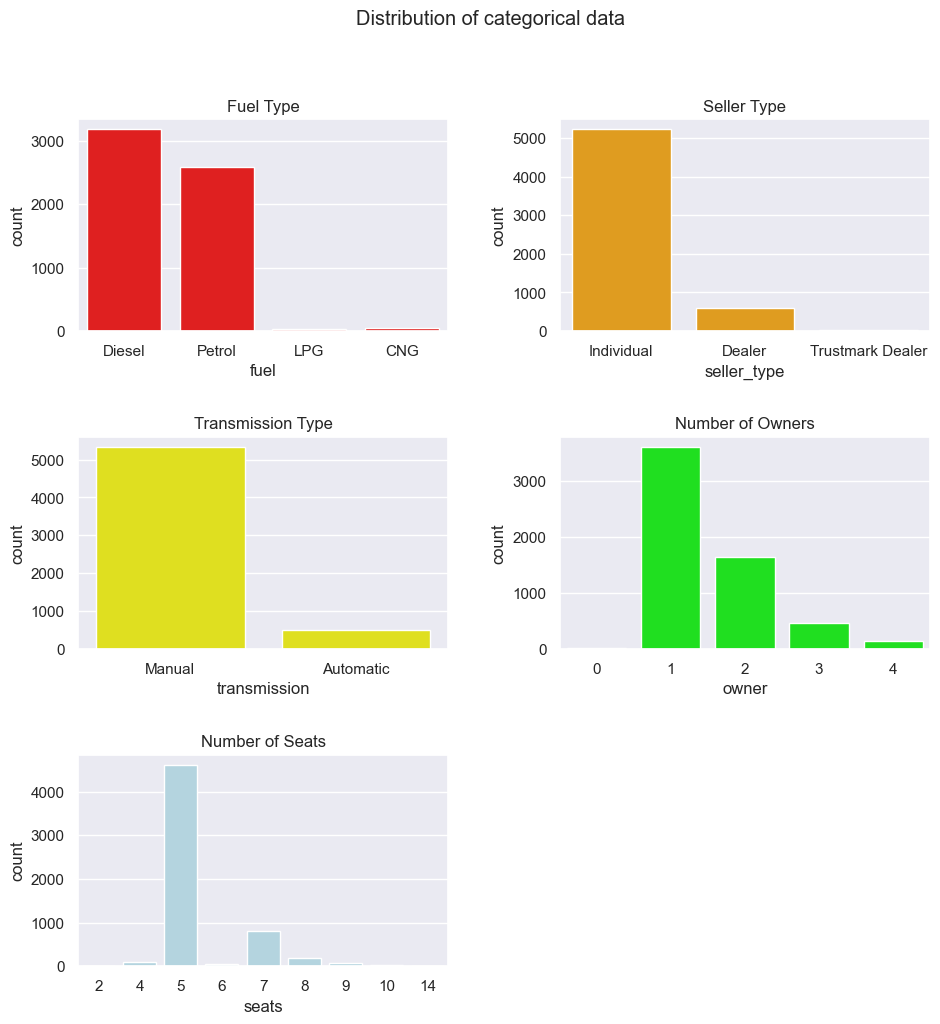

In [77]:
import adjustText 
fig, axes = plt.subplots(3, 2, figsize=(11, 11))

axes[0, 0].set_title("Fuel Type")
axes[0, 1].set_title("Seller Type")
axes[1, 0].set_title("Transmission Type")
axes[1, 1].set_title("Number of Owners")
axes[2, 0].set_title("Number of Seats")

# Строим столбчатые диаграммы для каждого категориального признака
sns.countplot(x='fuel', data=df_train, ax=axes[0, 0], color='red')
sns.countplot(x='seller_type', data=df_train, ax=axes[0, 1], color='orange')
sns.countplot(x='transmission', data=df_train, ax=axes[1, 0], color='yellow')
sns.countplot(x='owner', data=df_train, ax=axes[1, 1], color='lime')
sns.countplot(x='seats', data=df_train, ax=axes[2, 0],color='lightblue')
fig.delaxes(axes[2, 1])
fig.suptitle("Distribution of categorical data")
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [78]:
df_train_perfect = df_train.copy()
df_train_perfect['brand'] = df_train_perfect['name'].str.split(' ').str.get(0)
df_train_perfect.drop(['name'],axis=1,inplace=True)
df_train_perfect['selling_price'] = np.log(df_train_perfect['selling_price'])
df_train_perfect = df_train_perfect[df_train_perfect['km_driven'] < 300000]

df_train_perfect = df_train_perfect[~df_train_perfect['fuel'].isin(['CNG','LPG'])]

df_train_perfect = df_train_perfect[(df_train_perfect['mileage'] > 5) & (df_train_perfect['mileage'] < 35)]

df_train_perfect = df_train_perfect[(df_train_perfect['max_power'] > 0) & (df_train_perfect['max_power'] < 300)]
df_train_perfect['max_power'] = np.log(df_train_perfect['max_power'])

df_train_perfect['age'] = np.log(df_train_perfect['age'])

df_train_perfect = df_train_perfect.reset_index(drop=True)

In [80]:
df_train_perfect.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,age,brand
0,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248,4.304065,5,190.00,2000.0,1.945910,Maruti
1,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498,4.639765,5,250.00,2500.0,1.945910,Skoda
2,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396,4.499810,5,22.40,2750.0,2.397895,Hyundai
3,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298,4.479607,5,11.50,3000.0,2.639057,Maruti
4,12.994530,45000,Petrol,Individual,Manual,1,20.14,1197,4.405010,5,113.75,4000.0,1.386294,Hyundai


In [83]:
df_test_perfect = df_test.copy()
df_test_perfect['brand'] = df_test_perfect['name'].str.split(' ').str.get(0)
df_test_perfect.drop(['name'],axis=1,inplace=True)
df_test_perfect['selling_price'] = np.log(df_test_perfect['selling_price'])

df_test_perfect['max_power'] = np.log(df_test_perfect['max_power'])

# Log-transform the 'age' feature data.
df_test_perfect['age'] = np.log(df_test_perfect['age'])

df_test_perfect = df_test_perfect.reset_index(drop=True)

In [84]:
df_test_perfect

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,age,brand
0,12.345830,168000,Diesel,Individual,Manual,1,14.00,2498,4.718499,7,260.00,2200.0,2.397895,Mahindra
1,13.407542,25000,Diesel,Individual,Manual,1,21.50,1497,4.686750,5,260.00,2750.0,1.386294,Tata
2,12.072541,218463,Petrol,Individual,Automatic,1,12.90,1799,4.867534,5,172.00,4300.0,2.639057,Honda
3,13.361380,173000,Diesel,Individual,Manual,1,25.10,1498,4.591071,5,200.00,1750.0,1.791759,Honda
4,11.775290,70000,Petrol,Individual,Manual,2,16.50,1172,4.174387,5,96.00,3000.0,2.302585,Tata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,12.429216,100000,Petrol,Individual,Manual,2,19.81,1086,4.220243,5,99.04,4500.0,2.564949,Hyundai
927,12.994530,50000,Petrol,Individual,Manual,2,18.60,1197,4.404644,5,114.70,4000.0,1.386294,Hyundai
928,12.736701,40000,Diesel,Individual,Manual,1,23.00,1396,4.499810,5,22.40,2750.0,2.484907,Hyundai
929,12.765688,25000,Petrol,Individual,Manual,1,20.36,1197,4.368181,5,111.80,4000.0,2.197225,Hyundai


In [85]:
X_train_perfect = df_train_perfect.drop(columns=["selling_price"])
y_train = df_train_perfect['selling_price']

In [86]:
X_test_perfect = df_test_perfect.drop(columns=["selling_price"])
y_test = df_test_perfect['selling_price']

In [87]:
X_train_perfect

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,age,brand
0,145500,Diesel,Individual,Manual,1,23.40,1248,4.304065,5,190.00,2000.0,1.945910,Maruti
1,120000,Diesel,Individual,Manual,2,21.14,1498,4.639765,5,250.00,2500.0,1.945910,Skoda
2,127000,Diesel,Individual,Manual,1,23.00,1396,4.499810,5,22.40,2750.0,2.397895,Hyundai
3,120000,Petrol,Individual,Manual,1,16.10,1298,4.479607,5,11.50,3000.0,2.639057,Maruti
4,45000,Petrol,Individual,Manual,1,20.14,1197,4.405010,5,113.75,4000.0,1.386294,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,191000,Petrol,Individual,Manual,1,17.92,1086,4.128746,5,96.10,3000.0,2.564949,Hyundai
5712,50000,Petrol,Individual,Manual,2,18.90,998,4.206184,5,90.00,3500.0,2.079442,Maruti
5713,110000,Petrol,Individual,Manual,1,18.50,1197,4.417032,5,113.70,4000.0,2.079442,Hyundai
5714,119000,Diesel,Individual,Manual,4,16.80,1493,4.700480,5,24.00,3000.0,2.639057,Hyundai


In [88]:
cols = ['seats', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
encoded = encoder.fit(X_train_perfect[cols])
X_train_perfect_encoded = pd.DataFrame(encoded.transform(X_train_perfect[cols]).toarray(),columns=encoded.get_feature_names_out(cols),dtype=int)
X_train_perfect_encoded = pd.concat([X_train_perfect.drop(columns=cols), X_train_perfect_encoded], axis=1)

In [89]:
X_test_perfect_encoded = pd.DataFrame(encoded.transform(X_test_perfect[cols]).toarray(),columns=encoded.get_feature_names_out(cols),dtype=int)
X_test_perfect_encoded = pd.concat([X_test_perfect.drop(columns=cols), X_test_perfect_encoded], axis=1)

In [90]:
X_test_perfect_encoded

,km_driven,mileage,engine,max_power,torque,max_torque_rpm,age,seats_5,seats_6,seats_7,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,168000,14.00,2498,4.718499,260.00,2200.0,2.397895,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,25000,21.50,1497,4.686750,260.00,2750.0,1.386294,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,218463,12.90,1799,4.867534,172.00,4300.0,2.639057,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,173000,25.10,1498,4.591071,200.00,1750.0,1.791759,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70000,16.50,1172,4.174387,96.00,3000.0,2.302585,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,100000,19.81,1086,4.220243,99.04,4500.0,2.564949,1,0,0,...,0,0,0,0,0,0,0,0,0,0
927,50000,18.60,1197,4.404644,114.70,4000.0,1.386294,1,0,0,...,0,0,0,0,0,0,0,0,0,0
928,40000,23.00,1396,4.499810,22.40,2750.0,2.484907,1,0,0,...,0,0,0,0,0,0,0,0,0,0
929,25000,20.36,1197,4.368181,111.80,4000.0,2.197225,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_train_perfect_encoded

,km_driven,mileage,engine,max_power,torque,max_torque_rpm,age,seats_5,seats_6,seats_7,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,145500,23.40,1248,4.304065,190.00,2000.0,1.945910,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,21.14,1498,4.639765,250.00,2500.0,1.945910,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,127000,23.00,1396,4.499810,22.40,2750.0,2.397895,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120000,16.10,1298,4.479607,11.50,3000.0,2.639057,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45000,20.14,1197,4.405010,113.75,4000.0,1.386294,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,191000,17.92,1086,4.128746,96.10,3000.0,2.564949,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5712,50000,18.90,998,4.206184,90.00,3500.0,2.079442,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5713,110000,18.50,1197,4.417032,113.70,4000.0,2.079442,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5714,119000,16.80,1493,4.700480,24.00,3000.0,2.639057,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
num_var = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'age']
X_train_perfect_encoded[num_var] = scaler.fit_transform(X_train_perfect_encoded[num_var])

In [94]:
X_train_perfect_encoded

,km_driven,mileage,engine,max_power,torque,max_torque_rpm,age,seats_5,seats_6,seats_7,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,1.625066,1.032457,-0.378923,-0.377734,0.310017,-1.206509,0.136593,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.059497,0.439958,0.137749,0.663270,0.972441,-0.627166,0.136593,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.214752,0.927590,-0.073054,0.229269,-1.540354,-0.337494,0.915292,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.059497,-0.881366,-0.275589,0.166621,-1.660694,-0.047823,1.330777,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.603941,0.177790,-0.484324,-0.064703,-0.531813,1.110863,-0.827538,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,2.634219,-0.404221,-0.713727,-0.921398,-0.726676,-0.047823,1.203101,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5712,-0.493045,-0.147297,-0.895595,-0.681263,-0.794023,0.531520,0.366646,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5713,0.837706,-0.252164,-0.484324,-0.027425,-0.532365,1.110863,0.366646,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5714,1.037318,-0.697849,0.127415,0.851548,-1.522689,-0.047823,1.330777,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_test_perfect_encoded[num_var] = scaler.transform(X_test_perfect_encoded[num_var])

In [96]:
X_test_perfect_encoded

,km_driven,mileage,engine,max_power,torque,max_torque_rpm,age,seats_5,seats_6,seats_7,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2.124098,-1.431918,2.204436,0.907424,1.082845,-0.974772,0.915292,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.047524,0.534338,0.135682,0.808971,1.082845,-0.337494,-0.827538,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.243326,-1.720302,0.759821,1.369583,0.111290,1.458469,1.330777,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.234994,1.478141,0.137749,0.512271,0.420421,-1.496180,-0.128985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.049461,-0.776499,-0.535992,-0.779865,-0.727780,-0.047823,0.751088,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0.615914,0.091275,-0.713727,-0.637667,-0.694217,1.690206,1.203101,1,0,0,...,0,0,0,0,0,0,0,0,0,0
927,-0.493045,-0.225947,-0.484324,-0.065840,-0.521325,1.110863,-0.827538,1,0,0,...,0,0,0,0,0,0,0,0,0,0
928,-0.714837,0.927590,-0.073054,0.229269,-1.540354,-0.337494,1.065199,1,0,0,...,0,0,0,0,0,0,0,0,0,0
929,-1.047524,0.235467,-0.484324,-0.178910,-0.553342,1.110863,0.569568,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Best alpha = 1.0101
0.856959084605984


Text(0, 0.5, 'CV score')

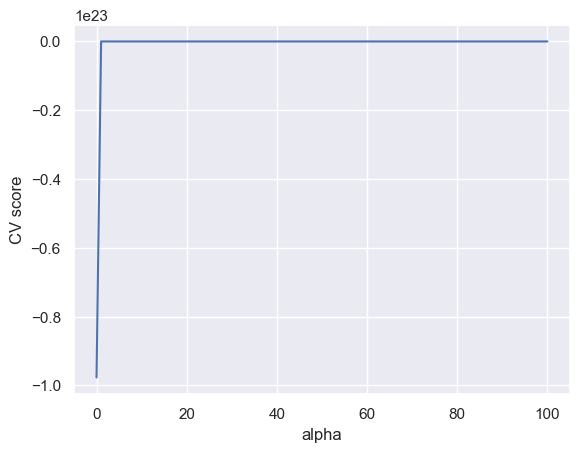

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(0, 100, 100)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="r2", cv=10)
searcher.fit(X_train_perfect_encoded, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)
print(searcher.best_score_)
plt.plot(alphas, searcher.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("CV score")

In [102]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error as MSE

ridge = Ridge(alpha=1).fit(X_train_perfect_encoded, y_train)
y_pred_train = np.exp(ridge.predict(X_train_perfect_encoded))
y_pred_test = np.exp(ridge.predict(X_test_perfect_encoded))

print("Train MSE = %.4f" % MSE(np.exp(y_train), y_pred_train))
print("Test MSE = %.4f" % MSE(np.exp(y_test), y_pred_test))

print("Train $R^2$ = %.4f" % r2_score(np.exp(y_train), y_pred_train))
print("Test $R^2$ = %.4f" %  r2_score(np.exp(y_test), y_pred_test))

Train MSE = 48312097884.3569
Test MSE = 43120052044.8332
Train $R^2$ = 0.8235
Test $R^2$ = 0.8796


In [87]:
import pickle
pkl_filename = "ridge" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(ridge, file) 

In [89]:
pkl_filename = "encoder" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(encoder, file) 

In [193]:
pkl_filename = "scaler" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(scaler, file) 

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [103]:
def business_metrics(y_true, y_pred):
    count = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= 0.1 * y_true[i]:
            count += 1
    return (count / len(y_true)) * 100

business_metrics(np.exp(y_test), y_pred_test) 

29.64554242749731

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link